<a href="https://colab.research.google.com/github/nicolemar3/perceptron-diabete/blob/main/Perceptron_per_classificazione_diabete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Rilevazione del diabete con Perceptron

 Dataset: Pima Indians Diabetes.


Il Perceptron è un modello usato per i problemi di classificazione binaria. Mappa gli ingressi in un valore scalare di output pari a: \begin{cases} 1 & \text{se } \mathbf{w} \cdot \mathbf{x} + b > 0 \\ 0 & \text{altrimenti} \end{cases}





 Costruiremo un modello di classificazione per predire la presenza di diabete in un paziente utilizzando il Perceptron

In [ ]:
import pandas as pd
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

url='https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv'

# Definisco i nomi delle colonne.
column_names= ['Gravidanze',
               'Glicemia',
               'Pressione sanguigna',
               'Spessore cutaneo',
               'Insulina',
               'Indice di Massa Corporea',
               'Funzione di predisposizione ereditaria',
               'Etá',
               'Esito' ] #1: presenza di diabete

df= pd.read_csv(url, header=None, names= column_names)

df.head()

,Gravidanze,Glicemia,Pressione sanguigna,Spessore cutaneo,Insulina,Indice di Massa Corporea,Funzione di predisposizione ereditaria,Etá,Esito
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
print(df.info())

print(df.describe())

#eventuali valori mancanti
print(df.isnull().sum)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Gravidanze                              768 non-null    int64  
 1   Glicemia                                768 non-null    int64  
 2   Pressione sanguigna                     768 non-null    int64  
 3   Spessore cutaneo                        768 non-null    int64  
 4   Insulina                                768 non-null    int64  
 5   Indice di Massa Corporea                768 non-null    float64
 6   Funzione di predisposizione ereditaria  768 non-null    float64
 7   Etá                                     768 non-null    int64  
 8   Esito                                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Gravidanze    Glicemia  ...         Etá       Esito
count  768.000000  768

Nelle colonne con valori come la glicemia, lo 0 non indica valore nullo, bensí dati mancanti.
Calcolo quindi la mediana  e la sostituisco ai valori nulli per evitare interpretazioni errate

In [ ]:
cols_zero_missing= ['Glicemia',
                    'Pressione sanguigna',
                    'Spessore cutaneo',
                    'Insulina',
                    'Indice di Massa Corporea']

for col in cols_zero_missing:
  zero_count=(df[col]==0).sum()
  print(f'Colonna {col} ha  {zero_count} valori zero')

for col in cols_zero_missing:
  median=df[col].median()
  df[col]= df[col].replace(0, median)

print(df.describe())

Colonna Glicemia ha  5 valori zero
Colonna Pressione sanguigna ha  35 valori zero
Colonna Spessore cutaneo ha  227 valori zero
Colonna Insulina ha  374 valori zero
Colonna Indice di Massa Corporea ha  11 valori zero
       Gravidanze    Glicemia  ...         Etá       Esito
count  768.000000  768.000000  ...  768.000000  768.000000
mean     3.845052  121.656250  ...   33.240885    0.348958
std      3.369578   30.438286  ...   11.760232    0.476951
min      0.000000   44.000000  ...   21.000000    0.000000
25%      1.000000   99.750000  ...   24.000000    0.000000
50%      3.000000  117.000000  ...   29.000000    0.000000
75%      6.000000  140.250000  ...   41.000000    1.000000
max     17.000000  199.000000  ...   81.000000    1.000000

[8 rows x 9 columns]


 Preparazione del dataset: separazione, suddivisione in training e test set, normalizzazione

---




In [ ]:
from sklearn.preprocessing import StandardScaler #Standardizzo i dati

X=df.drop('Esito', axis=1)
y=df['Esito']

#Per addestrare un modello, é necessario dividere i dati in training e test set.
#Il nostro dataset sará diviso in training set (80%) e test set (20%)

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=17)

scaler= StandardScaler()

#Fit e trasformazione
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

print(f'Dimensione del Training set: {X_train.shape}') #614 pazienti  nel training
print(f'Dimensione del Test set: {X_test.shape}') #154 pazienti

Dimensione del Training set: (614, 8)
Dimensione del Test set: (154, 8)


Fitting e valutazione della performance del modello

In [ ]:
model= Perceptron(max_iter=1000, random_state=17)
model.fit(X_train, y_train)

y_pred= model.predict(X_test)

test_accuracy= model.score(X_test, y_test)
print(f'Accuracy del modello sul test set: {test_accuracy:2f}')


Accuracy del modello sul test set: 0.629870


Recall score: mostra i veri positivi

In [ ]:
from sklearn.metrics import recall_score

recall= recall_score(y_test, y_pred)
print(f'Recall del modello sul test set: {recall:2f}')

Recall del modello sul test set: 0.666667


False positive rate: indica i falsi positivi

In [ ]:
fpr= 1- recall
print(f'False positive rate del modello sul test set: {fpr:2f}')

False positive rate del modello sul test set: 0.333333


La matrice di confusione ci aiuta a evidenziare i falsi positivi e i falsi negativi. Possiamo cosí capire meglio dove il modello commette errori di classificazione

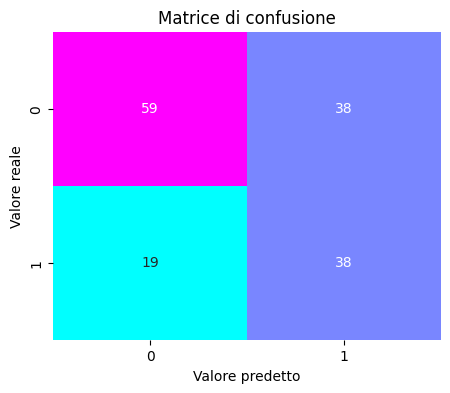

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

y_pred= model.predict(X_test)

c_matrix= confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(c_matrix, annot=True, fmt='d', cmap='cool', cbar=False)
plt.xlabel('Valore predetto')
plt.ylabel('Valore reale')
plt.title('Matrice di confusione')
plt.show()